[View in Colaboratory](https://colab.research.google.com/github/umairansar/Traffic-Sign-Classifier/blob/master/TrafficSignClassifierCNN.ipynb)

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [2]:

!wget "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
!unzip traffic-signs-data.zip

--2018-10-15 16:12:05--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.33.227.196, 13.33.227.175, 13.33.227.28, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.33.227.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip.2’

traffic-signs-data. 100%[===================>] 117.80M  76.2MB/s    in 1.5s    

2018-10-15 16:12:06 (76.2 MB/s) - ‘traffic-signs-data.zip.2’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
replace test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pickle
training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
   train = pickle.load(f)
with open(validation_file, mode='rb') as f:
   valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
   test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


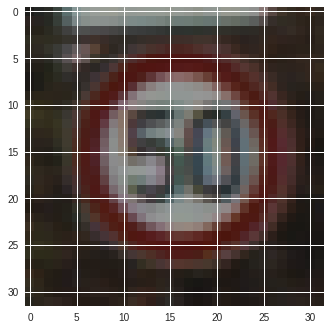

2


In [5]:
import matplotlib.pyplot as plt
import numpy as np

randomIndex = np.random.randint(0, len(X_train))
randomImage = X_train[randomIndex]

plt.imshow(randomImage)
plt.show()
print(y_train[randomIndex])

One Hot Encoding

Preprocessing -shuffle

(32, 32, 3)


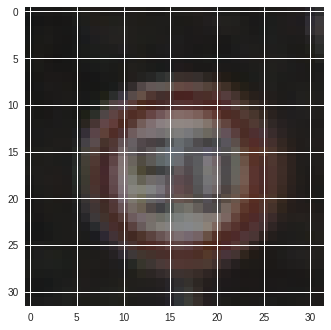

2
(34799, 32, 32, 1)
(32, 32, 1)


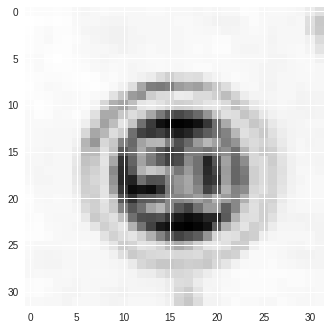

(32, 32, 1)


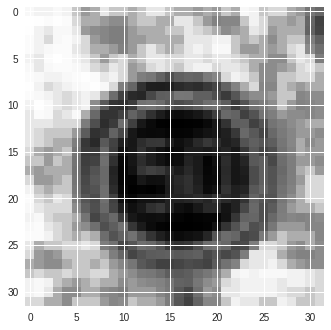

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

randomImage = X_train[randomIndex]
print(randomImage.shape)
plt.imshow(randomImage)
plt.show()
print(y_train[randomIndex])


# Making image (32,32,3) to (32,32,1) then (32,32)
preprocessed_train_images = []
preprocessed_test_images = []

#Grayscale conversion-Train
for i in range(len(X_train)):
  img = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY)
  img = img.reshape(32,32,1)
  preprocessed_train_images.append(img)
  
#Grayscale conversion-Test
for i in range(len(X_test)):
  img = cv2.cvtColor(X_test[i],cv2.COLOR_BGR2GRAY)
  img = img.reshape(32,32,1)
  preprocessed_test_images.append(img)
  


preprocessed_train_images_numpy = np.array(preprocessed_train_images)
preprocessed_test_images_numpy = np.array(preprocessed_test_images)
print(preprocessed_train_images_numpy.shape)


randomImage = preprocessed_train_images_numpy[randomIndex]
print(randomImage.shape)
randomImage = randomImage.squeeze()
plt.imshow(randomImage)
plt.show()

#HistogramEqualization-Train
preprocessed_train_images_numpy = preprocessed_train_images_numpy.astype(np.uint8)
for i in range(len(preprocessed_train_images_numpy)):
  img = cv2.equalizeHist(preprocessed_train_images_numpy[i])
  img = img.reshape(32,32,1)
  preprocessed_train_images_numpy[i] = img
  
#HistogramEqualization-Test
preprocessed_test_images_numpy = preprocessed_test_images_numpy.astype(np.uint8)
for i in range(len(preprocessed_test_images_numpy)):
  img = cv2.equalizeHist(preprocessed_test_images_numpy[i])
  img = img.reshape(32,32,1)
  preprocessed_test_images_numpy[i] = img

randomImage = preprocessed_train_images_numpy[randomIndex]
print(randomImage.shape)
randomImage = randomImage.squeeze()
plt.imshow(randomImage)
plt.show()

#Normalization
preprocessed_train_images_numpy = preprocessed_train_images_numpy/255.0 -0.5
preprocessed_test_images_numpy = preprocessed_test_images_numpy/255.0 -0.5







Lenet 5 (Modified)

In [7]:
from keras.utils import to_categorical
encoded = to_categorical(y_train)
test_encoded  = to_categorical(y_test)
print(encoded.shape)


import tensorflow as tf


n_classes = 43


x = tf.placeholder(tf.float32, shape=[None,32,32,1])
y = tf.placeholder(tf.float32, shape=[None,n_classes])


mu = 0
sigma = 0.1

# Convolution 1
weights_l1 = tf.Variable(tf.truncated_normal([5,5,1,6], mean = mu, stddev=sigma))   #5 by 5 = filter 1 dim image 6 filters and thus 6 output images
biases_l1 = tf.Variable(tf.truncated_normal([6]))

outlayer = tf.nn.conv2d(x, weights_l1, [1,1,1,1], padding="VALID")    # Third parameter is stride with first and last value fixed as 1. middle two values 1 x 1
outlayer +=biases_l1
outlayer = tf.nn.relu(outlayer)

# Maxpooling 1
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

# Convolution 2
weights_l2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean = mu, stddev=sigma))   # 16 means filters mentioned in research
biases_l2 = tf.Variable(tf.truncated_normal([16]))

outlayer = tf.nn.conv2d(outlayer, weights_l2, [1,1,1,1], padding="VALID")
outlayer += biases_l2
outlayer = tf.nn.relu(outlayer)

# Maxpooling 2
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

# Flattening
flattened = tf.reshape(outlayer,[-1,5*5*16])
print(flattened)

#FC1
wd1 = tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma))
bd1 = tf.Variable(tf.truncated_normal([120]))

outlayer = tf.matmul(flattened,wd1) + bd1 
outlayer = tf.nn.relu(outlayer)


#Dropout
outlayer = tf.nn.dropout(outlayer,0.5)

#FC2
wd2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma))
bd2 = tf.Variable(tf.truncated_normal([84]))

outlayer = tf.matmul(outlayer,wd2) + bd2
outlayer = tf.nn.relu(outlayer)

#LastLayer
wd3 = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma)) # n_classes = 43
bd3 = tf.Variable(tf.truncated_normal([1,n_classes]))

logits = tf.matmul(outlayer,wd3) + bd3 

cost = tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = logits)
cost = tf.reduce_mean(cost)

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()



# Checking accuracy
y_probabilities_predictions = tf.nn.softmax(logits)
y_class_predictions = tf.argmax(y_probabilities_predictions, axis=1)
y_true_labels = tf.argmax(y,1)

correct_predictions = tf.equal(y_class_predictions, y_true_labels)
total_correct = tf.reduce_sum(tf.cast(correct_predictions, tf.float32))




Using TensorFlow backend.


(34799, 43)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
Tensor("Reshape:0", shape=(?, 400), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
epochs = 22
batch_size = 128
saver = tf.train.Saver()

with tf.Session() as sess:
  init.run()
  for epoch in range(epochs):
    epoch_loss = 0
    #training by batches
    for offset in range(0, len(X_train), batch_size):
      end = offset + batch_size
      batch_x = preprocessed_train_images_numpy[offset:end]
      batch_y = encoded[offset:end]
      sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})
      c = sess.run(cost, feed_dict = {x:batch_x, y:batch_y})
      epoch_loss += c
    
    #Accuracy of test data
    total_accuracy_test = 0
    for offset in range(0,len(X_test),batch_size):
      end = offset + batch_size
      batch_x = preprocessed_test_images_numpy[offset:end]
      batch_y = test_encoded[offset:end]
      total_accuracy_in_batch = sess.run(total_correct,feed_dict={x:batch_x , y:batch_y})
      total_accuracy_test += total_accuracy_in_batch
      
     #Accuracy of train data
    total_accuracy_train = 0
    for offset in range(0,len(preprocessed_train_images_numpy),batch_size):
      end = offset + batch_size
      batch_x = preprocessed_train_images_numpy[offset:end]
      batch_y = encoded[offset:end]
      total_accuracy_in_batch = sess.run(total_correct,feed_dict={x:batch_x , y:batch_y})
      total_accuracy_train += total_accuracy_in_batch
     
    print("Epoch ",epoch," Epoch_Loss ",epoch_loss)
    print("TrainAccuracy ",total_accuracy_train / len(preprocessed_train_images_numpy))
    print("Test Accuracy ",total_accuracy_test / len(preprocessed_test_images_numpy))
  saver.save(sess,'./model.ckpt')

Epoch  0  Epoch_Loss  840.0201864242554
TrainAccuracy  0.441880513807868
Test Accuracy  0.4101346001583531
Epoch  1  Epoch_Loss  361.5612136721611
TrainAccuracy  0.6653926836978075
Test Accuracy  0.6125890736342042
Epoch  2  Epoch_Loss  246.1544387936592
TrainAccuracy  0.7377510848012874
Test Accuracy  0.6764053840063341
Epoch  3  Epoch_Loss  198.0674884915352
TrainAccuracy  0.783068478979281
Test Accuracy  0.7155977830562154
Epoch  4  Epoch_Loss  167.5857105255127
TrainAccuracy  0.8122072473346935
Test Accuracy  0.7334916864608076
Epoch  5  Epoch_Loss  147.74949517846107
TrainAccuracy  0.8292192304376562
Test Accuracy  0.7554235946159936
Epoch  6  Epoch_Loss  131.5035959482193
TrainAccuracy  0.8410873875686083
Test Accuracy  0.7607284243863817
Epoch  7  Epoch_Loss  120.74338284134865
TrainAccuracy  0.8570361217276359
Test Accuracy  0.7760095011876484
Epoch  8  Epoch_Loss  111.2441139370203
TrainAccuracy  0.8643351820454611
Test Accuracy  0.7849564528899445
Epoch  9  Epoch_Loss  104.82

In [9]:
from google.colab import files
upload = files.upload()

Saving lenet.jpg to lenet (1).jpg


In [13]:
!ls

 checkpoint			  test.p
'lenet (1).jpg'			  traffic-signs-data.zip
 lenet.jpg			  traffic-signs-data.zip.1
 model.ckpt.data-00000-of-00001   traffic-signs-data.zip.2
 model.ckpt.index		  train.p
 model.ckpt.meta		  valid.p
 sample_data


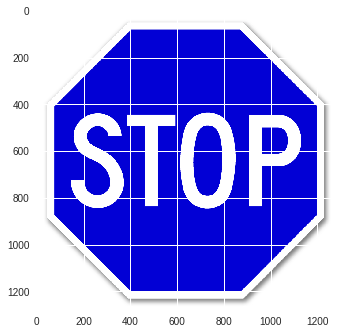

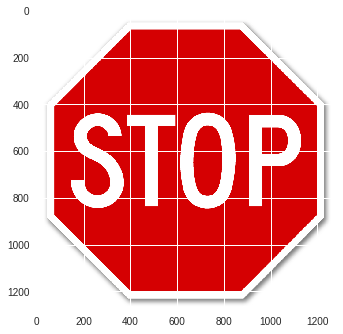

(32, 32, 3)


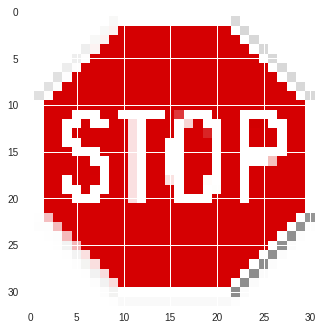

In [14]:

img = cv2.imread("lenet.jpg")
plt.imshow(img)
plt.show()

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(32,32))
print(img.shape)
plt.imshow(img)
plt.show()

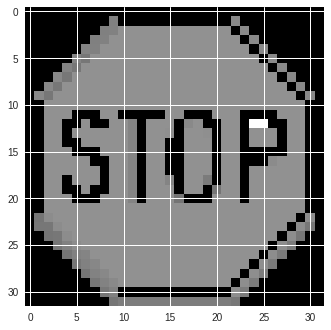

INFO:tensorflow:Restoring parameters from ./model.ckpt
[2]


In [15]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(32,32,1)
img = img.astype(np.uint8)
img = cv2.equalizeHist(img)
img = img.reshape(32,32,1)
img = img/225-0.5
tempImg = img.squeeze()
plt.imshow(tempImg)
plt.show()



with tf.Session() as sess:
  saver.restore(sess,"./model.ckpt")
  print(sess.run(y_class_predictions,feed_dict={x:[img]}))